# Word Cloud

Whenever we deal with textual data, it's really usedul if we can visualize the text.

Word Cloud displays the top words in the form of a cloud. As the frequency of any word increases in the complete dataset, the size of the word increases in the cloud.

## Import libraries

We'll begin by importing all the libraries that we will need.

As a side note, if you do not have a package, Jupyter notebooks allow you to run command line commands in the notebook itself. Just begin the `!` and write the command. I'll install `wordcloud` package using the same.

In [1]:
!pip install wordcloud

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Now that I have all packages, I can import them.

In [2]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Working with dataset

Now that we have imported all required libraries, we need to get our dataset. We'll import the file and combine all the text from the file into a single string from which we can create the Word Cloud.

In [3]:
dataset = pd.read_csv('dataset.csv', encoding='latin-1')
dataset.columns

Index(['author', 'date', 'headlines', 'read_more', 'text', 'ctext'], dtype='object')

The dataset includes a set of news summaries. We can pick any column we like and then create the respective chart for it.

In [4]:
all_headlines = ' '.join(dataset['headlines'].str.lower())
print(all_headlines)

daman & diu revokes mandatory rakshabandhan in offices order malaika slams user who trolled her for 'divorcing rich man'  'virgin' now corrected to 'unmarried' in igims' form aaj aapne pakad liya: let man dujana before being killed hotel staff to get training to spot signs of sex trafficking man found dead at delhi police station, kin allege foul play delhi hc reduces aid for 'negligent' accident victim by 45% 60-yr-old lynched over rumours she was cutting people's hair chopper flying critically low led to 2015 bombay high crash congress opens 'state bank of tomato' in lucknow food regulator planning leftover banks to feed hungry people call devastated his life: mom of boy who got 'google' offer 19 gurugram buildings to pay property tax over free parking human embryos edited to stop deadly disease for the 1st time nearly 2,300 cpwd buildings in delhi unsafe: union minister gujarat rajya sabha polls to be held with nota option: sc indian athlete indicted on sex abuse charge in us maruti

## Word Cloud

Now that we have a text data to work with, let's create our Word Cloud.
I identified that `will` was showing up as one of the top words. As it does not provide any useful topic information, I decided to include it in the stopwords and ignore it.

In [5]:
stopwords = STOPWORDS
stopwords.add('will')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_headlines)

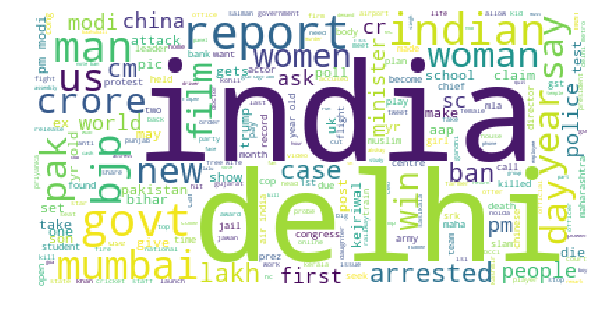

In [6]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can confirm the top words using the `Counter` and plotting them as a bar chart.

In [7]:
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

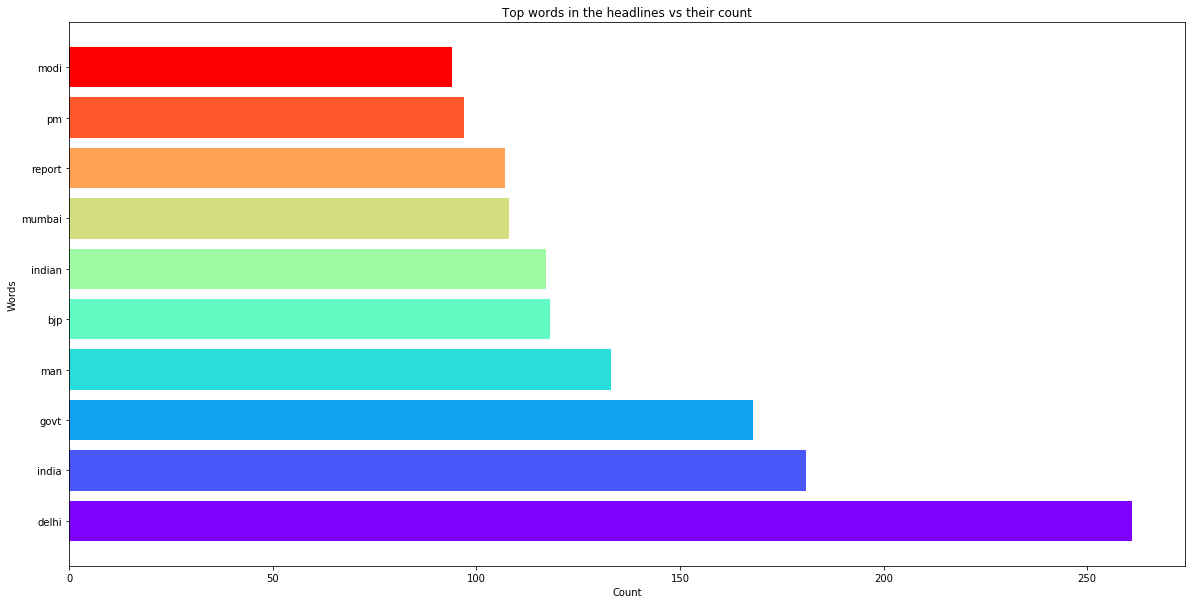

In [8]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

`India` and `Delhi` are two most frequent topics.

## Conclusion

In this notebook, we combined the headings from a number of news articles and identified the top words the news articles talk about. Such an analysis reveals the trending topics based on data.